In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [53]:
df=pd.read_csv(r"dataset\height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


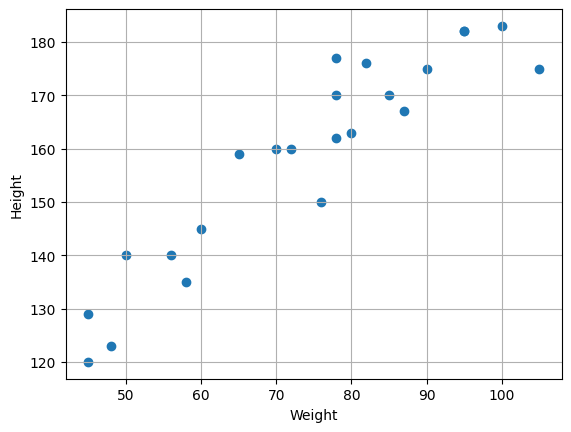

In [54]:
## scatter ploat
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)

In [55]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


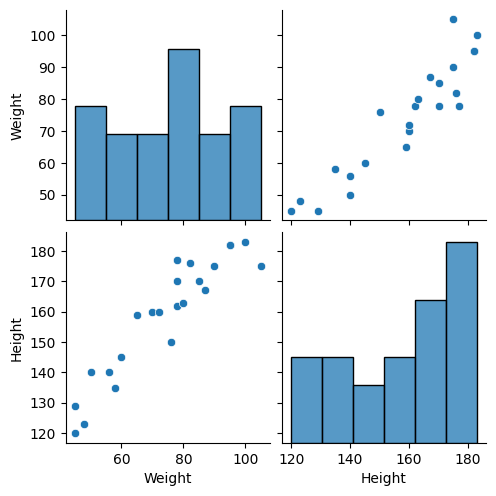

In [56]:
sns.pairplot(df)

In [57]:
## independent and dependent feature
# x=df['Weight'] series
x=df[['Weight']]  ## indepedent feature allways 2d array or data frame
# np.array(x).shape
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [58]:
## dependent featurre
y=df['Height']  ## this is 1 d array or series



In [59]:
# split train and split

from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [60]:
print(X_train.shape)
X_train


(17, 1)


,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [61]:
## standerdization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [62]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [63]:
x_test=scaler.transform(x_test)

In [64]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [65]:
## apply simple linear regeation
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [66]:
# slop of the best fit line

print(" Slop of the best fit line is : ",model.coef_)
print(" Slop of the best fit line is : ",model.intercept_)

 Slop of the best fit line is :  [17.2982057]
 Slop of the best fit line is :  156.47058823529412


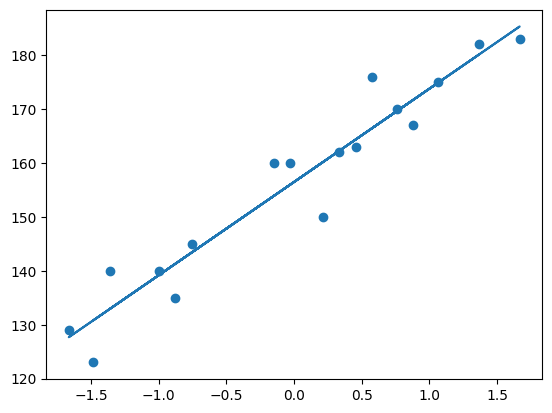

In [67]:
## plot best fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

In [71]:
# prediction for test data
y_predict=model.predict(x_test)
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [75]:
## performance matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  114.84069295228699
MAE :  9.66512588679501
RMSE :  10.716374991212605
